In [6]:
#pip install keras-nlp

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from tensorflow import keras
import keras_nlp
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('/kaggle/input/memotionnlp/updated_train.csv')
# Determine the minimum count of samples for each label

replace_value = {
    'negative': 0,
    'very_negative': 0,
    'neutral': 1,
    'positive': 2,
    'very_positive': 2
}
df['overall'] = df['overall'].replace(replace_value)
min_count = df['overall'].value_counts().min()

# Downsample each group to have an equal number of samples
df = pd.concat([group.sample(min_count) for _, group in df.groupby('overall')])
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

#iterating over the dataframe if ocr is null drop the frame
for index, row in df.iterrows():
    if pd.isna(row['ocr']):
        df.drop(index, inplace=True)

#defining X_train and Y_train
X_train = df['ocr']
Y_train = df['overall']
#changing into numeric values
Y_train = Y_train.replace(replace_value);
Y_train = np.array(Y_train,dtype=np.int32)

#changing into list
X_train = X_train.tolist()
X_train = [s.replace('\n', ' ') for s in X_train]

/tmp/ipykernel_34/2563875163.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['overall'] = df['overall'].replace(replace_value)


In [9]:
#reading the validation data
df = pd.read_csv('/kaggle/input/memotionnlp/updated_val.csv')

#iterating over the dataframe if ocr is null drop the frame
for index, row in df.iterrows():
    if pd.isna(row['ocr']):
        df.drop(index, inplace=True)

#defining X_valid and Y_valid
X_val = df['ocr']
Y_val = df['overall']

#changing into numeric values
Y_val = Y_val.replace(replace_value);
Y_val = np.array(Y_val,dtype=np.int32)

#changing into list
X_val = X_val.tolist()
X_val = [s.replace('\n', ' ') for s in X_val]

/tmp/ipykernel_34/453516099.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y_val = Y_val.replace(replace_value);


In [11]:
# Use a shorter sequence length.
preprocessor = keras_nlp.models.DistilBertPreprocessor.from_preset(
    "distil_bert_base_multi",
    sequence_length=128,
)
# Pretrained classifier.
classifier = keras_nlp.models.DistilBertClassifier.from_preset(
    "distil_bert_base_multi",
    num_classes=3,
    preprocessor=preprocessor,
)
classifier.fit(x=X_train, y=Y_train, batch_size=32)

# Re-compile (e.g., with a new learning rate)
classifier.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(5e-5),
    jit_compile=True,
    metrics=['accuracy']
)

# Access backbone programmatically (e.g., to change `trainable`).
classifier.backbone.trainable = False

# Fit again.
classifier.fit(x=X_train, y=Y_train,epochs = 25, batch_size=32, validation_data=(X_val, Y_val))

Attaching 'tokenizer.json' from model 'keras/distil_bert/keras/distil_bert_base_multi/2' to your Kaggle notebook...
Attaching 'tokenizer.json' from model 'keras/distil_bert/keras/distil_bert_base_multi/2' to your Kaggle notebook...
Attaching 'assets/tokenizer/vocabulary.txt' from model 'keras/distil_bert/keras/distil_bert_base_multi/2' to your Kaggle notebook...
Attaching 'config.json' from model 'keras/distil_bert/keras/distil_bert_base_multi/2' to your Kaggle notebook...
Attaching 'config.json' from model 'keras/distil_bert/keras/distil_bert_base_multi/2' to your Kaggle notebook...
Attaching 'model.weights.h5' from model 'keras/distil_bert/keras/distil_bert_base_multi/2' to your Kaggle notebook...
W0000 00:00:1713981666.164333     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


164/165 [============================>.] - ETA: 0s - loss: 1.0980 - sparse_categorical_accuracy: 0.3531

W0000 00:00:1713981741.827578     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


165/165 [==============================] - 101s 460ms/step - loss: 1.0979 - sparse_categorical_accuracy: 0.3529
Epoch 1/25


W0000 00:00:1713981769.916096     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


164/165 [============================>.] - ETA: 0s - loss: 1.0638 - accuracy: 0.4251

W0000 00:00:1713981845.659316     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


165/165 [==============================] - ETA: 0s - loss: 1.0636 - accuracy: 0.4251

W0000 00:00:1713981849.695281     122 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


165/165 [==============================] - 112s 522ms/step - loss: 1.0636 - accuracy: 0.4251 - val_loss: 1.1674 - val_accuracy: 0.3552


W0000 00:00:1713981855.844890     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 2/25
165/165 [==============================] - 69s 416ms/step - loss: 0.9500 - accuracy: 0.5516 - val_loss: 1.3227 - val_accuracy: 0.3626
Epoch 3/25
165/165 [==============================] - 68s 411ms/step - loss: 0.7687 - accuracy: 0.6695 - val_loss: 1.4515 - val_accuracy: 0.3619
Epoch 4/25
165/165 [==============================] - 68s 411ms/step - loss: 0.5731 - accuracy: 0.7652 - val_loss: 1.6482 - val_accuracy: 0.3484
Epoch 5/25
165/165 [==============================] - 68s 411ms/step - loss: 0.4598 - accuracy: 0.8146 - val_loss: 2.2283 - val_accuracy: 0.3059
Epoch 6/25
165/165 [==============================] - 68s 410ms/step - loss: 0.3529 - accuracy: 0.8604 - val_loss: 2.4398 - val_accuracy: 0.3228
Epoch 7/25
165/165 [==============================] - 68s 411ms/step - loss: 0.2671 - accuracy: 0.9041 - val_loss: 2.6290 - val_accuracy: 0.3133
Epoch 8/25
165/165 [==============================] - 68s 411ms/step - loss: 0.2069 - accuracy: 0.9223 - val_loss: 2.7577 - val_ac

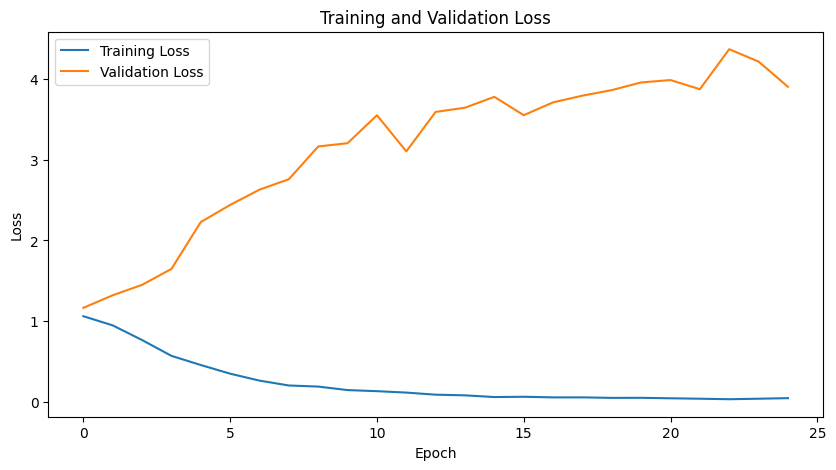

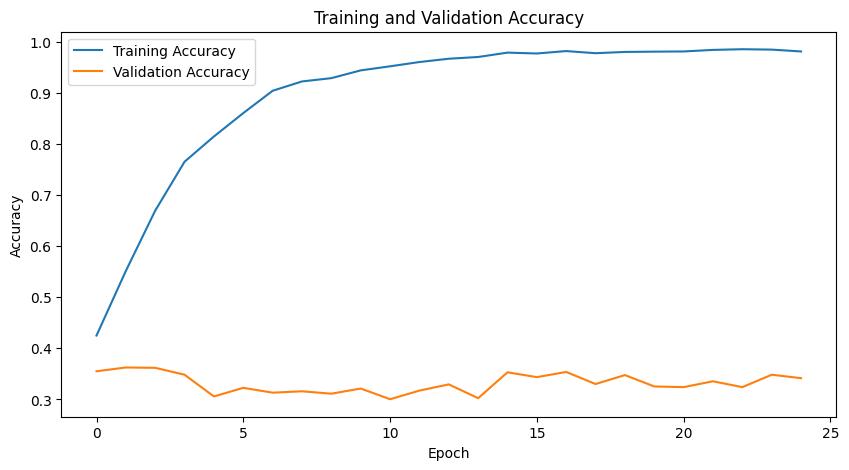

In [12]:
# Access the training history from the classifier object
training_loss = classifier.history.history['loss']
validation_loss = classifier.history.history['val_loss']
training_accuracy = classifier.history.history['accuracy']
validation_accuracy = classifier.history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [15]:
from keras.models import model_from_json

# Assuming you have already trained your model and named it 'model'
# Serialize model to JSON
model_json = classifier.to_json()
with open("/kaggle/working/25epoch_model.json", "w") as json_file:
    json_file.write(model_json)

# Serialize weights to HDF5
classifier.save("/kaggle/working/25epoch_model.keras")
print("Model saved to disk")



/opt/conda/lib/python3.10/site-packages/keras_nlp/src/models/task.py:82: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/opt/conda/lib/python3.10/site-packages/keras_nlp/src/models/task.py:82: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids


Model saved to disk
